**Data Pre-Processing in Excel**

1.   In the excel sheet we made 5 columns named Date, Days, Time, Data, Date_Extracted, Time_Span_Hour.
3.   In TIME_SPAN_HOUR we extracted hour from Time.
4.   We extracted only the date in the column DATE_EXTRACTED dicarding the month and year.
2.   Extracted data from Call Volume excel sheet and copied that data to Call_Volume_hourly.xlsx corresponding to respective Date and Time.





In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

**1. Uploading Excel sheets**

In [ ]:
from google.colab import files
call_data_hourly=files.upload()

Saving Call_Volume_hourly.xlsx to Call_Volume_hourly.xlsx


**2. Reading files with Pandas**

In [ ]:
import io
df=pd.read_excel(io.BytesIO(call_data_hourly['Call_Volume_hourly.xlsx']))
df

,Date,Days,Time,Data,DATE_EXTRACTED,TIME_SPAN_HOUR
0,2021-02-01,Monday,06:30:00,3,1,6
1,2021-02-01,Monday,07:30:00,5,1,7
2,2021-02-01,Monday,08:30:00,9,1,8
3,2021-02-01,Monday,09:30:00,17,1,9
4,2021-02-01,Monday,10:30:00,9,1,10
...,...,...,...,...,...,...
1411,2021-03-31,Wednesday,1900-01-01 01:30:00,5,31,1
1412,2021-03-31,Wednesday,1900-01-01 02:30:00,11,31,2
1413,2021-03-31,Wednesday,1900-01-01 03:30:00,9,31,3
1414,2021-03-31,Wednesday,1900-01-01 04:30:00,6,31,4


###**dropping Date and Time** column from datasheet

In [ ]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df

,Days,Data,DATE_EXTRACTED,TIME_SPAN_HOUR
0,Monday,3,1,6
1,Monday,5,1,7
2,Monday,9,1,8
3,Monday,17,1,9
4,Monday,9,1,10
...,...,...,...,...
1411,Wednesday,5,31,1
1412,Wednesday,11,31,2
1413,Wednesday,9,31,3
1414,Wednesday,6,31,4


###marking **weekends as 1 and weekdays as 0**

In [ ]:
df['Weekend'] = np.where(((df['Days'] == 'Saturday') | (df['Days'] == 'Sunday')), 1, 0)

In [ ]:
df

,Days,Data,DATE_EXTRACTED,TIME_SPAN_HOUR,Weekend
0,Monday,3,1,6,0
1,Monday,5,1,7,0
2,Monday,9,1,8,0
3,Monday,17,1,9,0
4,Monday,9,1,10,0
...,...,...,...,...,...
1411,Wednesday,5,31,1,0
1412,Wednesday,11,31,2,0
1413,Wednesday,9,31,3,0
1414,Wednesday,6,31,4,0


###dropping **Days** column from datasheet

In [ ]:
df.drop(['Days'], axis=1, inplace=True)

In [ ]:
df

,Data,DATE_EXTRACTED,TIME_SPAN_HOUR,Weekend
0,3,1,6,0
1,5,1,7,0
2,9,1,8,0
3,17,1,9,0
4,9,1,10,0
...,...,...,...,...
1411,5,31,1,0
1412,11,31,2,0
1413,9,31,3,0
1414,6,31,4,0


Now we should **analyse** our **dataset**.

We will import **seaborn library to plot a boxplot** which will describe to us about outliers.

Checking for the **Outliers** is important step which will help us in deciding best **evaluation metrics**.

If there are outliers **MAE is the best metric to evaluate errors**.


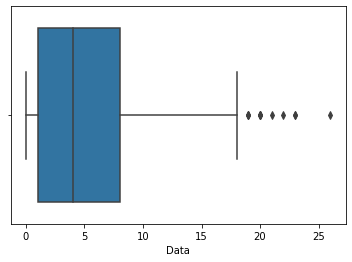

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Data"])

We will split our dataset in 3 parts-

1.   Train 70%
2.   Test 15%
1.   Live/Validation 15%

We will create validation set for only large datasets.

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(df.drop('Data',axis = 1),df['Data'],test_size = 0.3,random_state = 1)
X_test, X_live , y_test , y_live = tts(X_test,y_test,test_size = 0.5,random_state = 1)

Here we are importing Evaluation Metrics from sklearn library.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

**3. Applying RANDOM FOREST REGRESSION on the data**

We will use Random Forest Regressor as our model to predict the data(number of calls per hour).

Also, we will measure our performance using R2 score and will measuring Error by various methods such as Mean_Squared_Error , Root_Mean_Squared_Error, Mean_Absolute_Error.

Because our data has Outlier, **Mean Absolute Error will be the best metric to evaluate our result**.

In [ ]:
from sklearn.ensemble import RandomForestRegressor



rfr = RandomForestRegressor(n_estimators= 200 , max_depth=9 , n_jobs=-1 , random_state= 1)
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

rfr.fit(X_train , y_train)

import numpy as np
mae_train = mean_absolute_error((y_train) ,(rfr.predict(X_train)))
mae_test = mean_absolute_error((y_test) , (rfr.predict(X_test)))
mse_train = mean_squared_error((y_train) ,(rfr.predict(X_train)))
mse_test = mean_squared_error((y_test) , (rfr.predict(X_test)))
rmse_train = np.sqrt(mean_squared_error((y_train) ,(rfr.predict(X_train))))
rmse_test = np.sqrt(mean_squared_error((y_test) , (rfr.predict(X_test))))
R_score_train = r2_score((y_train) , (rfr.predict(X_train)))
R_score_test = r2_score((y_test) , (rfr.predict(X_test)))

mae_live = mean_absolute_error((y_live) ,(rfr.predict(X_live)))
mse_live = mean_squared_error((y_live) ,(rfr.predict(X_live)))
rmse_live = np.sqrt(mean_squared_error((y_live) ,(rfr.predict(X_live))))
R_score_live = r2_score((y_live) , (rfr.predict(X_live)))

print("ACCURACY : ")
print("Because our dataset has outliers Mean Absolute Error is best method")
print("Mean Absolute Error Training Set")
print(mae_train)
print("Mean Absolute Error Test Set")
print(mae_test)
print("Mean Absolute Error Live Set")
print(mae_live)
print("")
print("Higher the value greater the accuracy")
print("R2 Score Training Set")
print(R_score_train)
print("R2 Score Test Set")
print(R_score_test)
print("R2 Score Live Set")
print(R_score_live)


print("")
print("")

print("Root Mean Squared Error Training Set")
print(rmse_train)
print("Root Mean Squared Error Test Set")
print(rmse_test)
print("Root Mean Squared Error Live Set")
print(rmse_live)
print("Mean Squared Error Training Set")
print(mse_train)
print("Mean Squared Error Test Set")
print(mse_test)
print("Mean Squared Error Live Set")
print(mse_live)

ACCURACY : 
Because our dataset has outliers Mean Absolute Error is best method
Mean Absolute Error Training Set
1.5637727668366284
Mean Absolute Error Test Set
2.076091143639528
Mean Absolute Error Live Set
1.9919109088790272

Higher the value greater the accuracy
R2 Score Training Set
0.7722168111039897
R2 Score Test Set
0.5693142761878311
R2 Score Live Set
0.5646601082027449


Root Mean Squared Error Training Set
2.1047638983321577
Root Mean Squared Error Test Set
2.9388203565896514
Root Mean Squared Error Live Set
2.706814465833283
Mean Squared Error Training Set
4.430031067722382
Mean Squared Error Test Set
8.636665088305724
Mean Squared Error Live Set
7.326844552444323


# Calculating Number of Engineers Required

In [ ]:
data = [[15 , 17 , 0] , ]

Predecting for **Date = 15 , Time = 5:30 PM , Weekday**(no Weekend)

In [ ]:
rfr.predict(data)

array([4.2447566])

##Further Processing

The model predicts the number of calls.

Average Handling Time of call is given 14 minutes.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day. 

So, they will work for 18.75 minutes(= 450 minutes / 24 hours) per hour.

The number of minutes workers are required per hour = the number of call * Average Handling Time of call

Thus, the number of resourses required = (The number of minutes workers are required) / (Number of minutes each workers works per hour)

In [ ]:
number_of_chats=4.2447566
number_of_resourses_required=(number_of_chats)*14/18.75
number_of_resourses_required

3.169418261333333


# *4 Engineers required on 15th April , 5:30 PM with weekday.*



